# PET simulation analysis

Run the simulation with `main1_pet_vereos_f18.py`.
The output will be the file `output/output.root`.

Vocabulary:
- events: (Geant4) primary particle tracked by the MC engine (source)
- track: (Geant4) every tracked particle is a track (including primary and secondaries)
- step: (Geant4) tracking is divided in step
- hits: (Gate) individual interaction inside a detector (with energy deposition)
- singles: combined hits in a given element (i.e. a single detector)

The following is not yet available in this Gate version:
- coincidences: time associated singles
- trues: real, expected coincidences
- randoms: accidental coincidence
- scatters: coincidence events resulting from scattered photons inside the phantom
- prompts: total number of detected coincidences (sum of Trues + Randoms + Scatters)
- delays: estimated number of scattered coincidence

In [1]:
# some functions are defined in the file called pet_helpers.py
# they will be available with p.function_name()
# Example: 
import pet_helpers as p
p.hello()

Hello World


In [2]:
print("Hello from the PET course!")
import numpy as np
import pet_helpers as p

Hello from the PET course!


In [3]:
import os
from pathlib import Path
# The following command display the current working directory (where jupyter has been launched)
# and select the output folder
cwd = os.getcwd()
folder = Path(os.path.join(cwd, './output'))
if (not folder.is_dir()):
    print(f'ERROR: {folder} is not a folder.')
print(f'The Current Working Directory (CWD) is {cwd}')
print(f'The output folder is {folder}')

The Current Working Directory (CWD) is /Users/thomastennapel/PetProject/PET example
The output folder is /Users/thomastennapel/PetProject/PET example/output


In [4]:
# print information about the simulation by reading the stat.txt file
stat = os.path.join(folder, 'stats_vereos.txt')
fs = open(stat, 'r').read()
n_events = int(p.get_stat_value(fs, '# NumberOfEvents = '))
t_start = int(p.get_stat_value(fs,  '# StartDate             = '))
t_stop = int(p.get_stat_value(fs,   '# EndDate               = '))
print(f'Number of simulated events (primaries): {n_events}')
print(f'Simulation timing: {t_start} to {t_stop} seconds')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/thomastennapel/PetProject/PET example/output/stats_vereos.txt'

The content of this root file is a set of data, organized in keys. For example, you can retrieve all the particles information of the 'Hits' or of the 'Singles'.

In [11]:
# opening the files
import uproot
filename = os.path.join(folder, "output_vereos.root")
f = uproot.open(filename)

# print the list of trees
for t in f:
    print(f'Tree {t}')

# get the first tree and print the branches
hits = f['Hits']
print()
print(f'Number of hits : {hits.num_entries}')
for b in hits:
    print(f'Branch {b.name}')

Tree Hits;1
Tree Singles1;1
Tree Singles2;1
Tree Singles3;1
Tree Singles4;1
Tree Singles5;1

Number of hits : 2.0
Branch PostPosition_X
Branch PostPosition_Y
Branch PostPosition_Z
Branch TotalEnergyDeposit
Branch PreStepUniqueVolumeID
Branch GlobalTime
Branch LocalTime


In [12]:
# helper function to plot X,Y position plot
def plot_position(a, values, title, point_size=1):
    position_x = p.tget(values, 'PostPosition_X')
    position_y = p.tget(values, 'PostPosition_Y')
    a.scatter(position_x, position_y, s=point_size)
    a.set_aspect("equal", adjustable="box")
    a.set_xlabel("mm")
    a.set_ylabel("mm")
    a.set_title(f"Transaxial detection position ({title}) ")

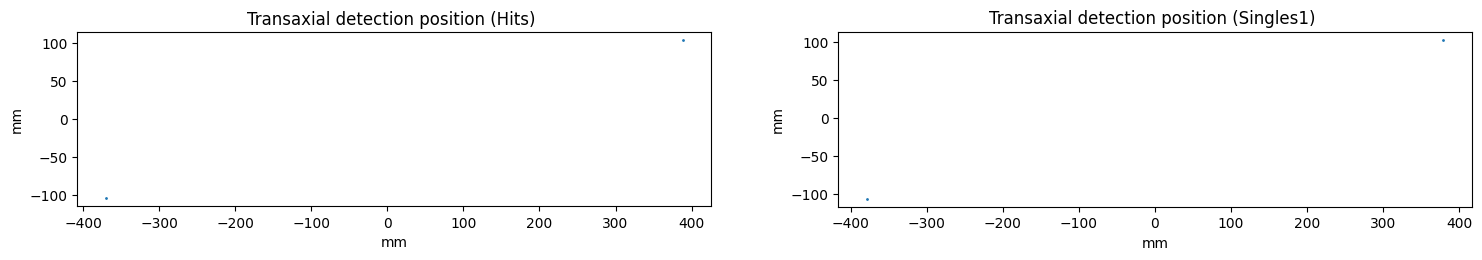

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# plot the trans-axial position
plot_position(ax[0], hits, 'Hits')

# idem for the singles
singles1 =  f['Singles1']
plot_position(ax[1], singles1, 'Singles1')

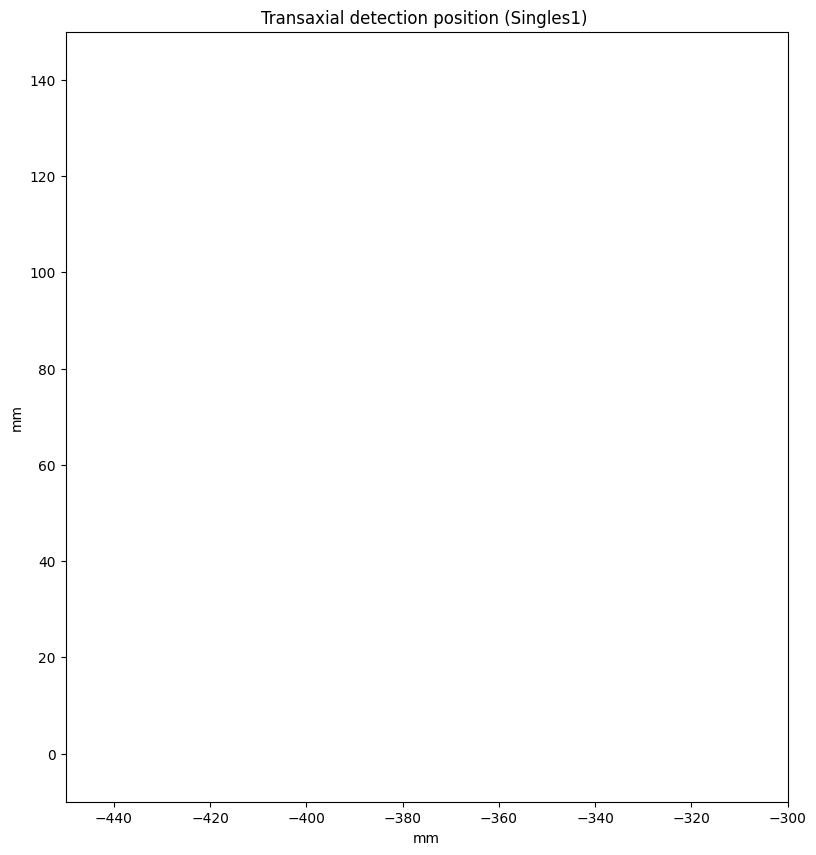

In [14]:
# "zoom" on a given crystal
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# plot the trans-axial position
plot_position(ax, hits, 'Hits', 6)
ax.set_xlim(-450, -300)
ax.set_ylim(-10, 150)

# idem for the singles
singles1 =  f['Singles1']
plot_position(ax, singles1, 'Singles1', 10)


# Plot the energy  of the hits and singles

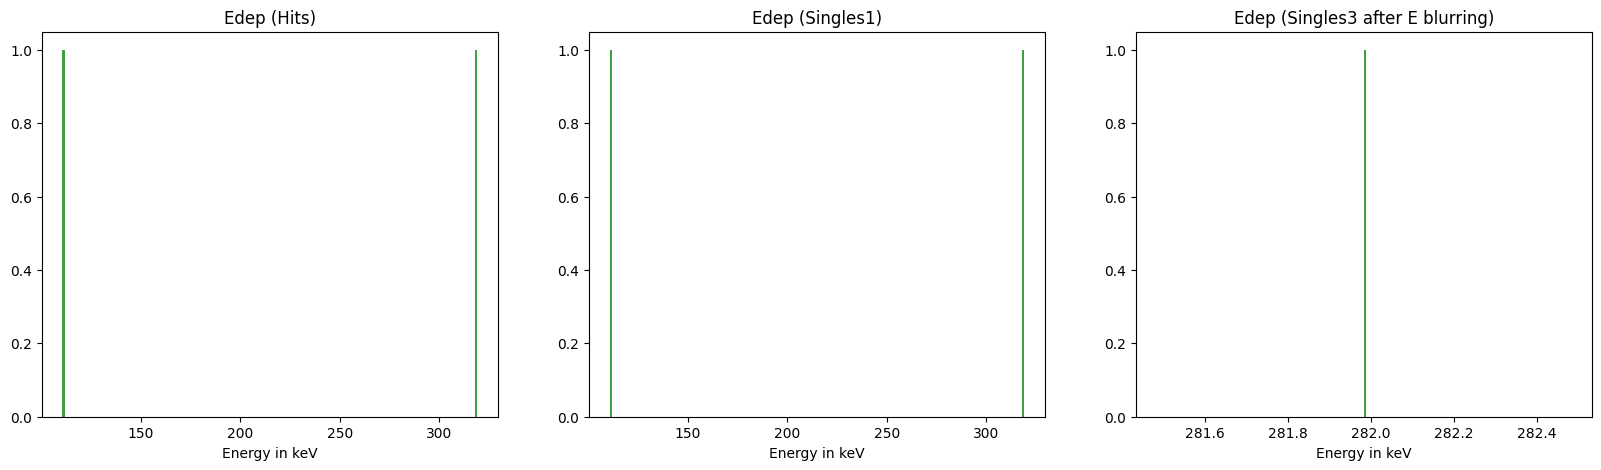

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# hits
energy = hits.arrays()['TotalEnergyDeposit']/0.001
a = ax[0]
n, bins, patches = a.hist(energy, 200, facecolor='green', alpha=0.75)
a.set_title('Edep (Hits)')
a.set_xlabel('Energy in keV');

# singles
energy = singles1.arrays()['TotalEnergyDeposit']/0.001
a = ax[1]
n, bins, patches = a.hist(energy, 200, facecolor='green', alpha=0.75)
a.set_title('Edep (Singles1)')
a.set_xlabel('Energy in keV');


# singles after E blurring 
singles3 =  f['Singles3']
energy = singles3.arrays()['TotalEnergyDeposit']/0.001
a = ax[2]
n, bins, patches = a.hist(energy, 200, facecolor='green', alpha=0.75)
a.set_title('Edep (Singles3 after E blurring)')
a.set_xlabel('Energy in keV');



Text(0.5, 0, 'Time in ns')

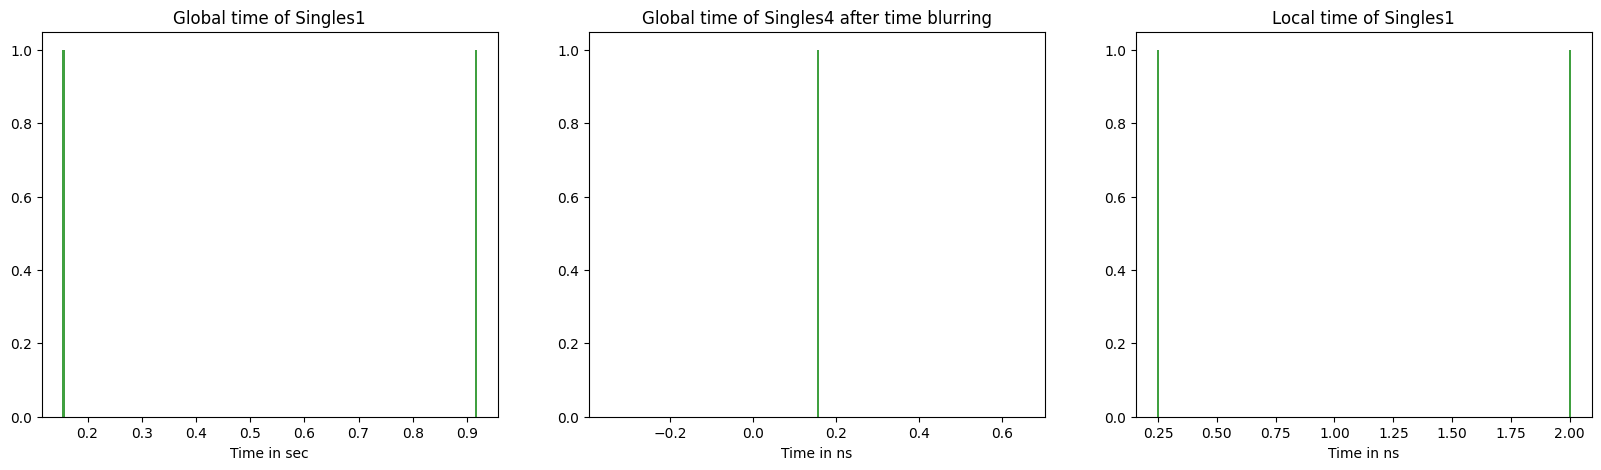

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# singles
times = singles1.arrays()['GlobalTime']/1e9
a = ax[0]
n, bins, patches = a.hist(times, 200, facecolor='green', alpha=0.75)
a.set_title('Global time of Singles1')
a.set_xlabel('Time in sec')

# singles after E blurring 
singles4 =  f['Singles4']
times = singles4.arrays()['GlobalTime']/1e9
a = ax[1]
n, bins, patches = a.hist(times, 200, facecolor='green', alpha=0.75)
a.set_title('Global time of Singles4 after time blurring')
a.set_xlabel('Time in ns')

# singles
times = singles1.arrays()['LocalTime']
a = ax[2]
n, bins, patches = a.hist(times, 200, facecolor='green', alpha=0.75)
a.set_title('Local time of Singles1')
a.set_xlabel('Time in ns')


